# 2D роборука

### Установка необходимых компонентов(для отрисовки на сервере)
На локальной машине скорее всего не требуется

In [ ]:
!sudo apt update && sudo apt-get install xvfb xserver-xephyr vnc4server -y

In [ ]:
#installation
!pip install pyvirtualdisplay
!pip install pyglet==1.2.4
!sudo apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg-dev xvfb xorg-dev python-opengl libboost-all-dev libsdl2-dev swig -y

In [ ]:
!pip install pyopengl

In [ ]:
!sudo apt install freeglut-devel

In [ ]:
!sudo apt install freeglut3-dev -y

In [18]:
import gym
from gym import spaces
from gym.utils import seeding, EzPickle
import math
import numpy as np

In [19]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from robohand_2d import *
from lqr_controller import *

In [21]:
SERVER = True
TEST = True

In [33]:
if SERVER:
    from pyvirtualdisplay import Display
    display = Display(visible=0, size=(1024, 768))
    display.start()
    import os
    os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

In [43]:
if not TEST:
    from gym.envs.registration import registry, register, make, spec
    register(
        id='TRoboHand-v0',
        entry_point=TRoboHand2D,
        max_episode_steps=1000,
        reward_threshold=0,
    )

In [44]:
STEPS = 100

In [45]:
import gym

if TEST or True:
    env = TRoboHand2D( STEPS+1, 50, 50, moving_goal=True )
else:
    env = gym.make_env('TRoboHand2D-v0')
    

In [46]:
#Получаем динамику
F, f, C, c = env.reset()

In [47]:
#Создаем LQR
lqr = LQRController(STEPS, env.x_size, env.u_size)
steps = lqr.find_trajectory1( F, f, C, c, env.x )
print(steps[:3])

[[ 0.13232595  0.49893534]
 [ 0.03292351  0.12451596]
 [-0.00298891 -0.01079657]]


In [48]:
#Запуск
frames = []
for i in range(STEPS):
    env.step( steps[i] )

    if SERVER:
        frames += [env.render(mode='rgb_array')]
    else:
        env.render(mode='human')
    
env.close()


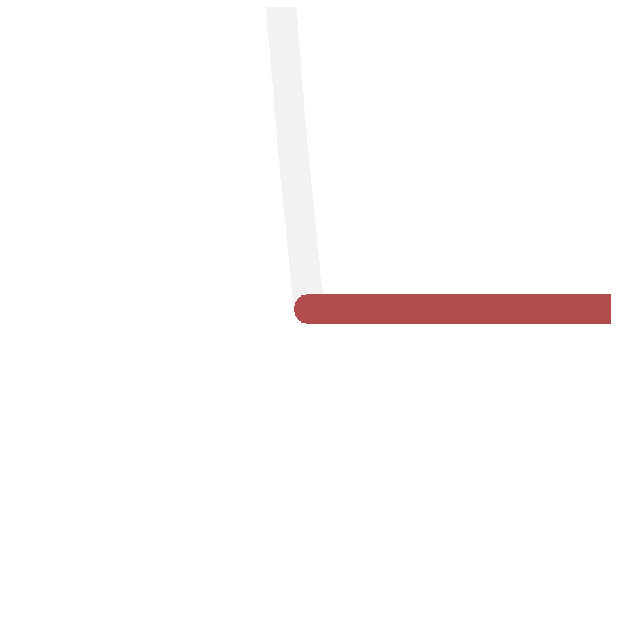

In [49]:
#Отрисовка на сервере
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

plt.figure(figsize=(frames[0].shape[1] / 72.0 * 2.0, frames[0].shape[0] / 144.0 * 2.0 ), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())
